In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Too many warning messages before plots, these lines hide them
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
# import the Seoul bike dataset as a pandas dataframe
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding='latin1')
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# We look at the types of each column of the dataframe
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

# Data Cleaning

In [ ]:
data[data["Functioning Day"] == False]["Rented Bike Count"].sum()
# The column named "Fuctionning Day" is boolean and we see that  every time the value is set to False, Bike Count value equals to 0 but the purpose
# of this study is to guess the value of Bike Count using the other columns so we will delete the column named 'Functionning Day' because it is useless. 

# With this commands, we checked the number of NaN values (none) and the presence of empty string (none too)
# for col in data.columns:
#   print(data[col].isnull().sum()) # NaN
#   print(data[col].eq("").sum())   # ""

0

In [ ]:
# DROP
# We delete the column "Functioning Day"
data = data.drop("Functioning Day", axis=1)
# We delete the column "Date" because it is useless in our study
data = data.drop("Date", axis=1)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [ ]:
# We transform all the value of the column "Holiday", if the value is "Holiday" we set the new value to True
# if the value is "No Holiday", the new value is set to False
data["Holiday"] = data["Holiday"].apply(lambda x: False if x == "No Holiday" else True)
data.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,False
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,False
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,False
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,False
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,False
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,False


In [ ]:
# We check the diversity of the colum "Holiday" by counting the number of True value  
data[data["Holiday"] == True].count()

Rented Bike Count            432
Hour                         432
Temperature(°C)              432
Humidity(%)                  432
Wind speed (m/s)             432
Visibility (10m)             432
Dew point temperature(°C)    432
Solar Radiation (MJ/m2)      432
Rainfall(mm)                 432
Snowfall (cm)                432
Seasons                      432
Holiday                      432
dtype: int64

In [ ]:
# We look at all the possible value of the column "Seasons"
# data["Seasons"].unique()
# We replace the string value of the column "Seasons" for integer values respecting the dictionnary dict_seasons_int
dict_seasons_int = { 'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3 }
data["Seasons"] = data["Seasons"].replace(dict_seasons_int)
data.head(15)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,False
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,False
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,False
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,False
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,False
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,False


# Data Visualization

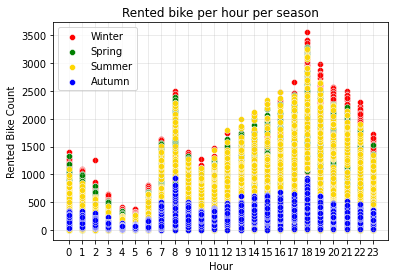

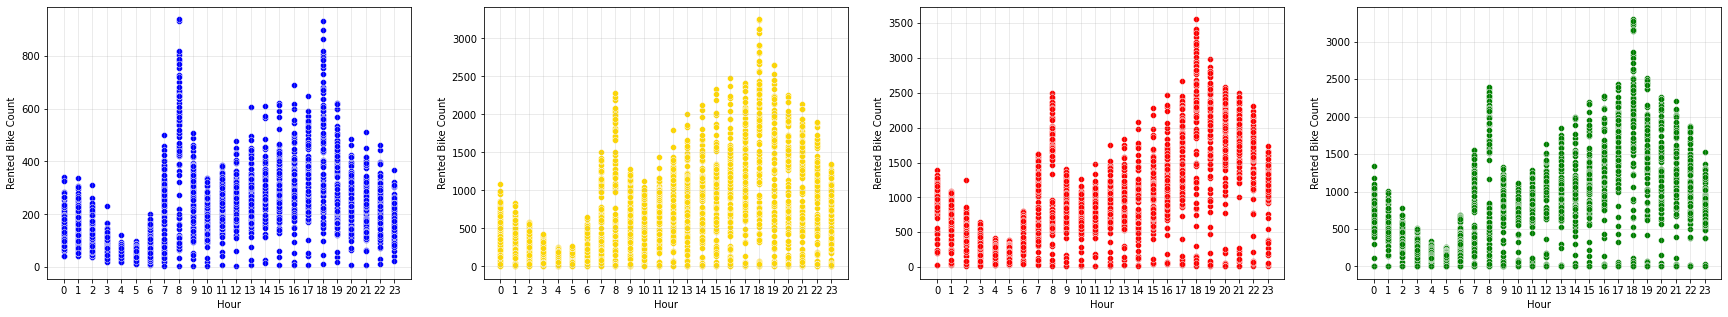

In [ ]:
# SEABORN SCATTERPLOT
# Graphic of the Number of rented bike per hour per seasons
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Summer"]], color="red")
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Autumn"]], color="green")
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Spring"]], color="gold")
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Winter"]], color="blue")
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.title("Rented bike per hour per season")
plt.legend(["Winter", "Spring", "Summer", "Autumn"])
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(30, 5))
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Winter"]], color="blue", ax=ax[0])
ax[0].set_xticks(range(24))
ax[0].grid(alpha=0.3)
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Spring"]], color="gold", ax=ax[1])
ax[1].set_xticks(range(24))
ax[1].grid(alpha=0.3)
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Summer"]], color="red", ax=ax[2])
ax[2].set_xticks(range(24))
ax[2].grid(alpha=0.3)
sns.scatterplot("Hour", "Rented Bike Count", data=data[data["Seasons"] == dict_seasons_int["Autumn"]], color="green", ax=ax[3])
ax[3].set_xticks(range(24))
ax[3].grid(alpha=0.3)


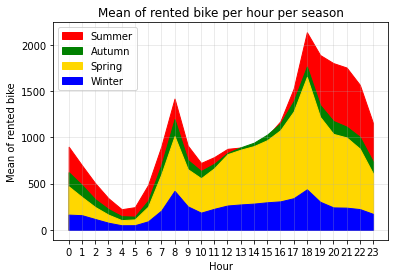

In [ ]:
# AREA PLOT (SAME AS BEFORE)
# Graphic of the mean of rented bike per hour per season
# We see a clear difference of the mean of the number of rented bike between summer and winter
Y_Winter = [data[data["Seasons"] == dict_seasons_int["Winter"]][data["Hour"] == i]["Rented Bike Count"].mean() for i in range(24)]
Y_Spring = [data[data["Seasons"] == dict_seasons_int["Spring"]][data["Hour"] == i]["Rented Bike Count"].mean() for i in range(24)]
Y_Summer = [data[data["Seasons"] == dict_seasons_int["Summer"]][data["Hour"] == i]["Rented Bike Count"].mean() for i in range(24)]
Y_Autumn = [data[data["Seasons"] == dict_seasons_int["Autumn"]][data["Hour"] == i]["Rented Bike Count"].mean() for i in range(24)]
plt.fill_between(range(24), Y_Summer, color="red")
plt.fill_between(range(24), Y_Autumn, color="green")
plt.fill_between(range(24), Y_Spring, color="gold")
plt.fill_between(range(24), Y_Winter, color="blue")
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.legend(["Summer", "Autumn", "Spring", "Winter"], loc="upper left")
plt.xlabel("Hour")
plt.ylabel("Mean of rented bike")
plt.title("Mean of rented bike per hour per season")
plt.show()

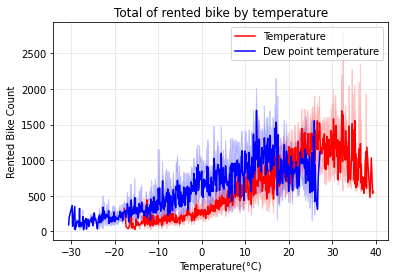

In [ ]:
# TEMPERATURE
# Graphic of the total of rented bike by temperature
sns.lineplot("Temperature(°C)", "Rented Bike Count", data=data, color="red")
sns.lineplot("Dew point temperature(°C)", "Rented Bike Count", data=data, color="blue")
plt.legend(["Temperature", "Dew point temperature"])
plt.grid(alpha=0.3)
plt.title("Total of rented bike by temperature")
plt.show()

In [ ]:
#These curves are very similar, we can therefore remove the "Dew point temperature" variable because it does not bring much information
data = data.drop("Dew point temperature(°C)", axis=1)

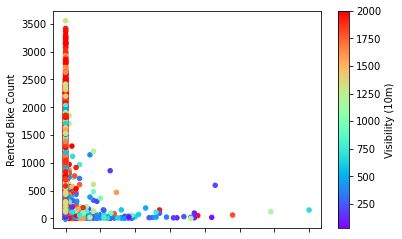

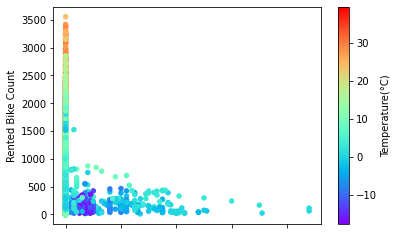

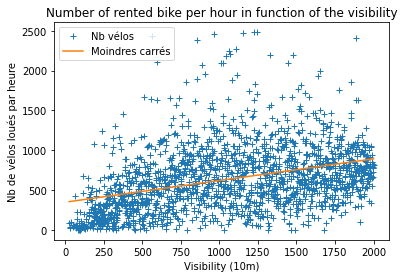

In [ ]:
# SCATTER PLOTS
# Les variables Visibility et Rainfall ne semblent pas du tout liées
data.plot.scatter("Rainfall(mm)", "Rented Bike Count", c="Visibility (10m)", colormap="rainbow")
plt.show()

data.plot.scatter("Snowfall (cm)", "Rented Bike Count", c="Temperature(°C)", colormap="rainbow")
plt.show()

# VISIBILITY
import numpy as np
rented_bike_average_visibility =  data.groupby(["Visibility (10m)"]).mean() # ["Rented Bike Count"]
x = np.array(list( rented_bike_average_visibility.index ))
y = np.array(list(rented_bike_average_visibility["Rented Bike Count"]))
# Calcul des coefficients des moindres carrés
m,b = np.polyfit(x,y,1)

plt.plot( list( rented_bike_average_visibility.index ), list(rented_bike_average_visibility["Rented Bike Count"]), linewidth=0, marker = "+", label="Nb vélos" )
plt.plot(x, m*x+b, label="Moindres carrés")
plt.xlabel("Visibility (10m)")
plt.ylabel("Nb de vélos loués par heure")
plt.legend()
plt.title("Number of rented bike per hour in function of the visibility")
plt.show()

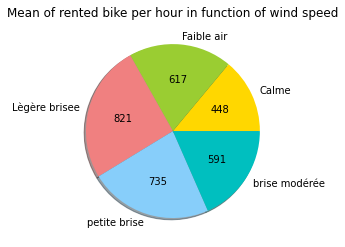

In [ ]:

# CAMEMBERT
# Graphic of the mean of rented bike by hour in function of the wind speed
# 5 forces de vent :  # car Wind Speed go from 0 to 7.4 # data["Wind speed (m/s)"].min()
# 0 : 0       : Calme
# 1 : 0 à 1.5 : Faible air
# 2 : 1.5 à 3 : Légère brise
# 3 : 3 à 5   : petite brise
# 4 : 5 à 8   : brise modèrée
# Modify Wind Speed
def Wind_Speed_Ranking(WindSpeed):
  if 0 == WindSpeed: return 0
  elif 0 < WindSpeed and WindSpeed <= 1.5: return 1
  elif 1.5 < WindSpeed and WindSpeed <= 3: return 2
  elif 3 < WindSpeed and WindSpeed <= 5: return 3
  else: return 4


data["Wind speed (m/s)"] = data["Wind speed (m/s)"].apply( Wind_Speed_Ranking )
# Obtiens la moyenne de vélos loués en une heure en fonction de la force du vent
rented_bike_average_wind_speed =  list(data.groupby(["Wind speed (m/s)"]).mean()["Rented Bike Count"])
# for i in [0,1,2,3,4]:
  # rented_b_c_a_w_s = data[data["Wind speed (m/s)"] == i]["Rented Bike Count"].sum() / len( data[data["Wind speed (m/s)"] == i] )
  # rented_bike_average_wind_speed.append( rented_b_c_a_w_s )
# Permet d'afficher les valeurs de chaque partie du graphique
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
# Les labels utilisés dans le pie chart
labels = [ "Calme","Faible air","Lègère brisee","petite brise","brise modérée" ]
# Les couleurs utilisés dans le pie chart
colors = [ 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "c" ]
plt.pie(rented_bike_average_wind_speed, labels=labels, colors=colors,
        shadow = True, autopct = autopct_format(rented_bike_average_wind_speed))
# shadow to make it more good looking
# autopct to plot the number on the pie chart
plt.title("Mean of rented bike per hour in function of wind speed")
plt.show()


In [ ]:
# DONC WINDSPEED N'A PAS D'IMPACT SUR LE NOMBRE DE VELOS LOUEES 
# DONC ON SUPPRIME CETTE COLONNE
data = data.drop("Wind speed (m/s)", axis=1)

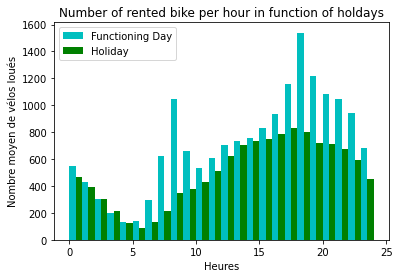

In [ ]:
# BAR PLOT
# Graphic of the mean of rented bike per hour by holiday or not 
rented_bike_by_hour_holiday     = data[data["Holiday"]==True ].groupby(["Hour"]).mean()["Rented Bike Count"]
rented_bike_by_hour_not_holiday = data[data["Holiday"]==False].groupby(["Hour"]).mean()["Rented Bike Count"]


plt.bar( [i+0.25 for i in range(24)], list(rented_bike_by_hour_not_holiday), label="Functioning Day",color="c",width=.5 )
plt.bar( [i+0.75 for i in range(24)], list(rented_bike_by_hour_holiday),     label="Holiday"        ,color="g",width=.5 )
plt.legend()
plt.xlabel("Heures")
plt.ylabel("Nombre moyen de vélos loués")
plt.title("Number of rented bike per hour in function of holdays")
plt.show()


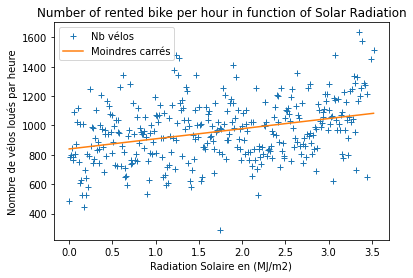

In [ ]:
# SOLAR RADIATION
# Graphic of the Number of rented bike per hour in function of Solar Radiation
import numpy as np

rented_bike_average_solar_radiation =  data.groupby(["Solar Radiation (MJ/m2)"]).mean() # ["Rented Bike Count"]
x = np.array(list( rented_bike_average_solar_radiation.index ))
y = np.array(list(rented_bike_average_solar_radiation["Rented Bike Count"]))

# Calculation of the least squares coefficients
m,b = np.polyfit(x,y,1)
plt.plot( list( rented_bike_average_solar_radiation.index ), list(rented_bike_average_solar_radiation["Rented Bike Count"]), linewidth=0, marker = "+", label="Nb vélos" )
plt.plot(x, m*x+b, label="Moindres carrés")
plt.xlabel("Radiation Solaire en (MJ/m2)")
plt.ylabel("Nombre de vélos loués par heure")
plt.legend()
plt.title("Number of rented bike per hour in function of Solar Radiation")
plt.show()


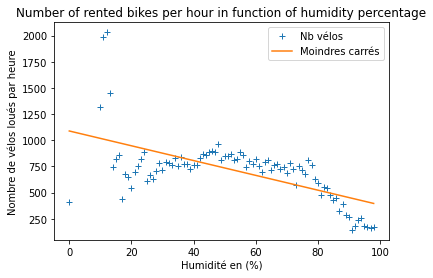

In [ ]:
# HUMIDITY
# Graphic of  the Number of rented bike per hour in function of Humidity
import numpy as np

rented_bike_average_humidity =  data.groupby(["Humidity(%)"]).mean() # ["Rented Bike Count"]
x = np.array(list( rented_bike_average_humidity.index ))
y = np.array(list(rented_bike_average_humidity["Rented Bike Count"]))

# Calculation of the least squares coefficients
m,b = np.polyfit(x,y,1)
plt.plot( list( rented_bike_average_humidity.index ), list(rented_bike_average_humidity["Rented Bike Count"]), linewidth=0, marker = "+", label="Nb vélos" )
plt.plot(x, m*x+b, label="Moindres carrés")
plt.xlabel("Humidité en (%)")
plt.ylabel("Nombre de vélos loués par heure")
plt.legend()
plt.title("Number of rented bikes per hour in function of humidity percentage")
plt.show()


In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2000,0.0,0.0,0.0,0,False
1,204,1,-5.5,38,2000,0.0,0.0,0.0,0,False
2,173,2,-6.0,39,2000,0.0,0.0,0.0,0,False
3,107,3,-6.2,40,2000,0.0,0.0,0.0,0,False
4,78,4,-6.0,36,2000,0.0,0.0,0.0,0,False


# Modeling 

In [ ]:
# Separation of the dataset into two sets of data, one for the training, one for the tests
from sklearn.model_selection import train_test_split
X = data.loc[:,"Hour":]
Y = data["Rented Bike Count"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5869, 9), (2891, 9), (5869,), (2891,))

In [ ]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
7673,17,18.4,38,1565,0.50,0.0,0.0,3,False
8398,22,8.7,53,764,0.00,0.0,0.0,3,False
6000,0,29.1,77,1465,0.00,0.0,0.0,2,False
7716,12,16.8,50,2000,1.94,0.0,0.0,3,False
2115,3,1.1,44,1128,0.00,0.0,0.0,0,False


In [ ]:
# Standardize except "Holiday" and "Hour" because they are boolean type
from sklearn.preprocessing import StandardScaler

temp = (X_train["Hour"], X_train["Holiday"], X_test["Hour"], X_test["Holiday"])
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:,0], X_train[:,-1], X_test[:,0], X_test[:,-1] = temp

In [ ]:
# Rando Forest
# Nearest neighbors
# Lasso
# Decision Tree 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
# Function that shows the prediction of a model by modifying its parameters into a given range. It plots one graphic by parameter. 
def validation_curves(model, params):
  fig, ax = plt.subplots(len(params.keys())//3 + 1, 3, figsize=(15,15))
  for i, key in enumerate(params.keys()):
    param = params[key]
    train_score, val_score = validation_curve(model, X_train, Y_train, param_name=key, param_range=param)
    ax[i//3, i - (i//3)*3].plot(param, val_score.mean(axis=1))
    ax[i//3, i - (i//3)*3].plot(param, train_score.mean(axis=1))
    ax[i//3, i - (i//3)*3].legend(["val_score", "train_score"])
    ax[i//3, i - (i//3)*3].set_title(key)
  plt.tight_layout()
  plt.show()

# For each following models, we used validation_curves and using this resluts, we tried to find the best prediction

## Lasso

In [ ]:
#Lasso().get_params()
#selection : "cyclic", "random"
params = {"alpha" : np.arange(-5, 5, 0.1),
          "copy_X" : [False, True],
          "fit_intercept" : [False, True],
          "max_iter" : np.arange(50, 5000, 50),
          "normalize" : ["deprecated", False, True],
          "positive": [False, True],
          "precompute": [False, True],
          "random_state": [None] + [i for i in range(1001)],
          "selection": ["cyclic", "random"],
          "tol": np.arange(0.00001, 0.001, 0.0001),
          "warm_start": [False, True]}

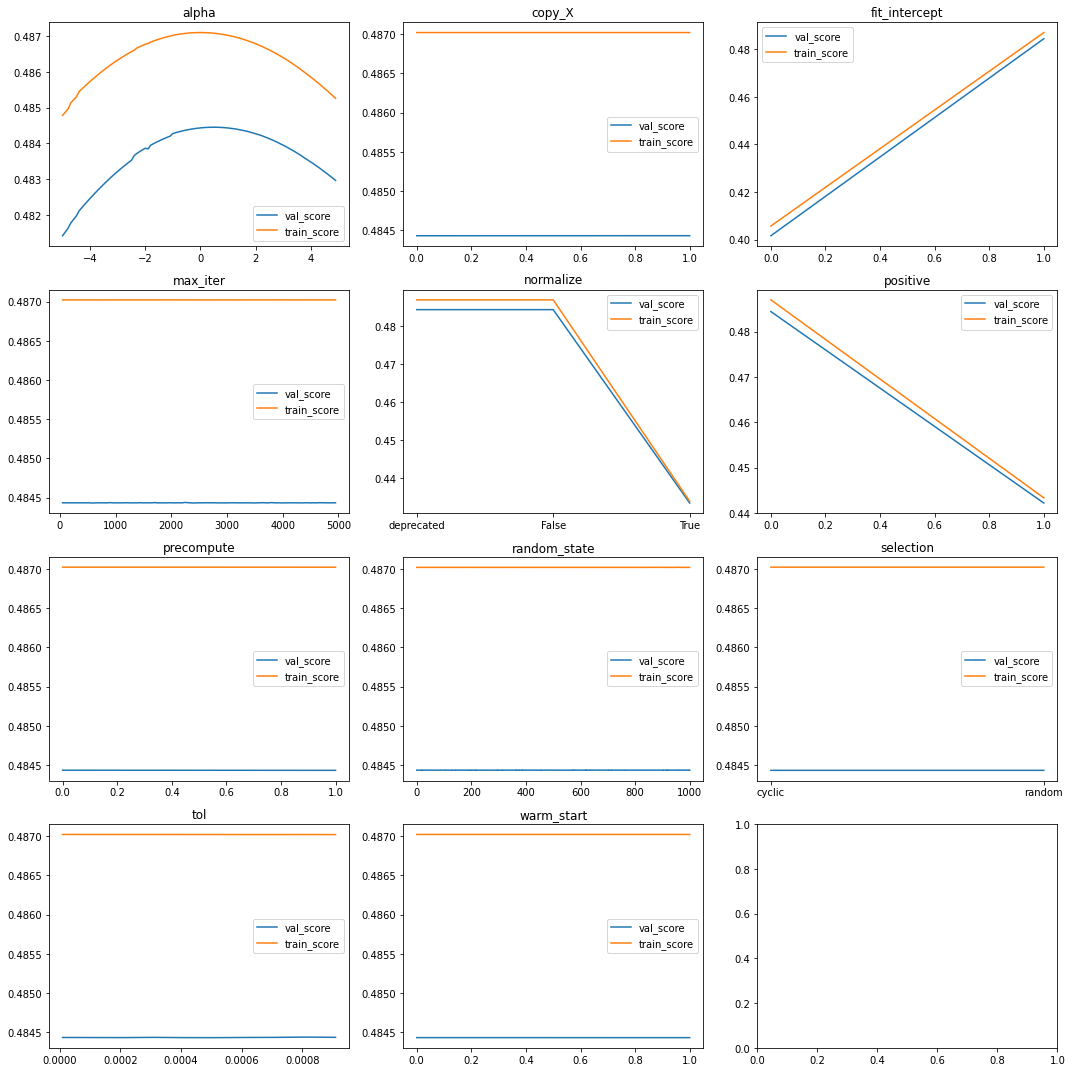

In [ ]:
validation_curves(Lasso(fit_intercept=True, normalize="deprecated", positive=False, selection="random"), params)

In [ ]:
# Best prediction according to the previous graphics
model = Lasso(fit_intercept=True, normalize="deprecated", positive=False, selection="random")
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.46605520360128017

## Linear Regression

In [ ]:
#LinearRegression().get_params()
params = {"copy_X": [False, True],
          "fit_intercept": [False, True],
          "n_jobs": [None]+[i for i in range(1, 101)],
          "normalize": ["deprecated", False, True],
          "positive": [False, True]}

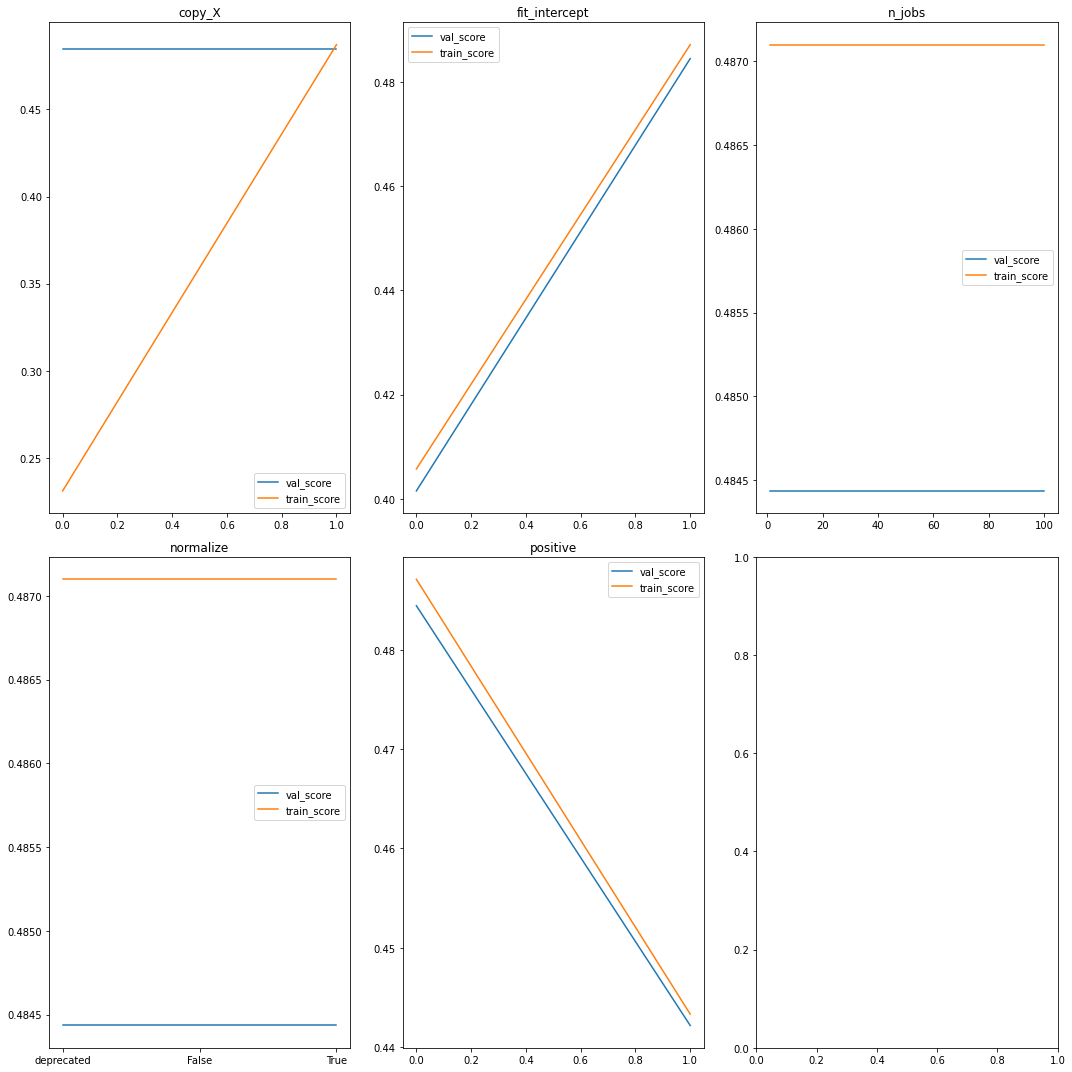

In [ ]:
validation_curves(LinearRegression(copy_X = True, fit_intercept = True, positive = False), params)

In [ ]:
# Best prediction according to the previous graphics
model = LinearRegression(copy_X = True, fit_intercept = True, positive = False)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.46538917797034374

## Decision Tree

In [ ]:
#DecisionTreeRegressor().get_params()
params = {"ccp_alpha": np.arange(500, 1000, 10), #np.arange(0, 2000, 50)
          "criterion": ["squared_error", "friedman_mse", "absolute_error"], #["squared_error", "friedman_mse", "absolute_error", "poisson"]
          "max_depth": [None]+[i for i in range(7, 11)], #[None]+[i for i in range(1, 21)]
          "max_features": [None] + [i for i in np.arange(0, 10, 1)], #[None] + [i for i in np.arange(0, 1, 0.1)]
          "max_leaf_nodes": [None]+[i for i in range(20, 60)], #[None]+[i for i in range(101)]
          "min_impurity_decrease": np.arange(250, 750, 10), #np.arange(0, 2000, 50)
          "min_samples_leaf": np.arange(10, 30, 1), #np.arange(1, 100, 5)
          "min_samples_split": np.arange(30, 50, 1), #np.arange(1, 100, 5)
          "min_weight_fraction_leaf": np.arange(0, 100, 5)}

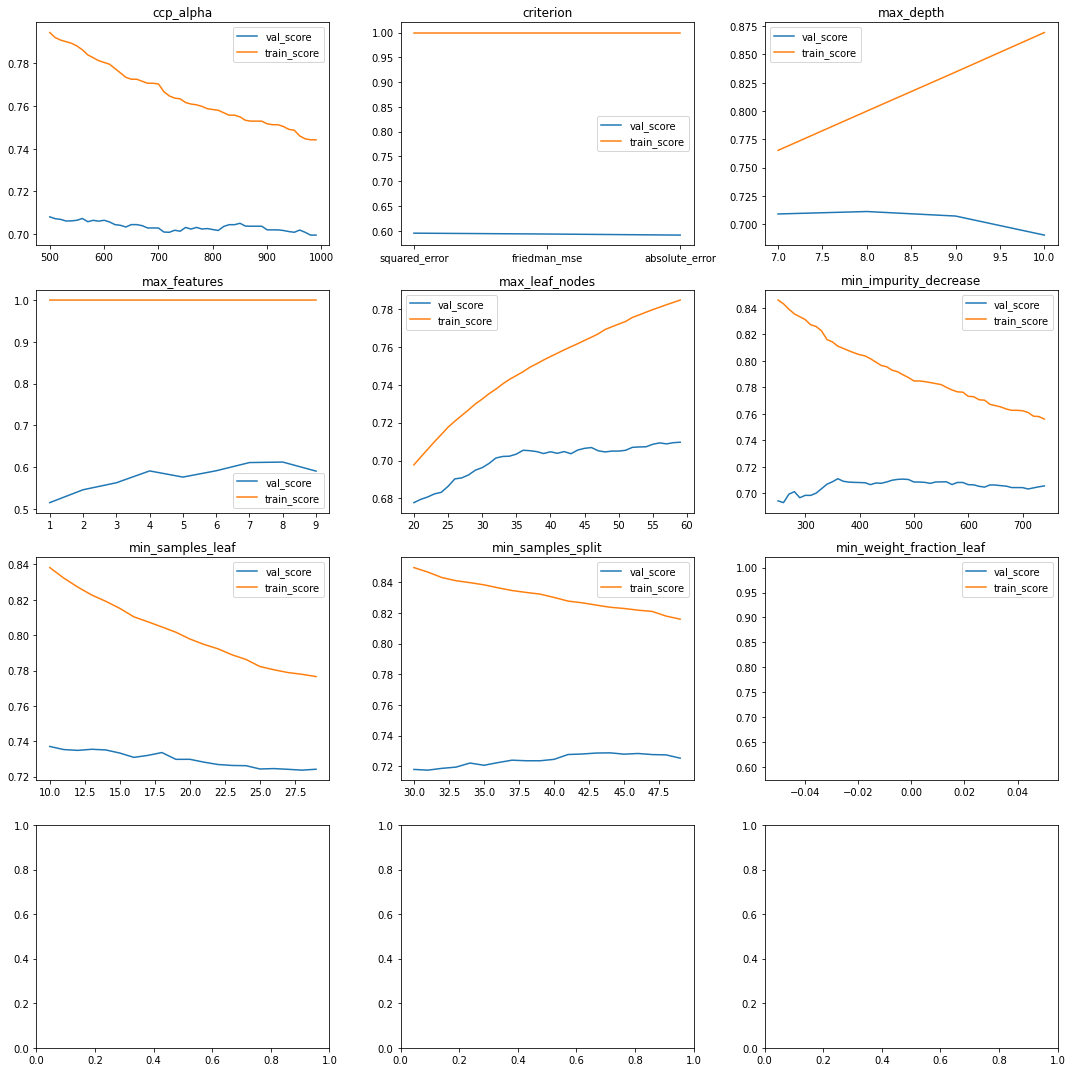

In [ ]:
validation_curves(DecisionTreeRegressor(), params)

In [ ]:
# Best prediction according to the previous graphics
model = DecisionTreeRegressor(ccp_alpha = 690, criterion = "friedman_mse", max_depth = 9, max_features = 5, max_leaf_nodes = 54, min_impurity_decrease = 600, min_samples_leaf = 22, min_samples_split = 40)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6432028364712288

## K Nearest Neighbors

In [ ]:
#KNeighborsRegressor().get_params()
params = {#'algorithm':  ["auto", "ball_tree", "kd_tree", "brute"],
          #'leaf_size': np.arange(1, 100, 1),
          #'metric': ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalnobis"],
          #'n_jobs': np.arange(1, 10, 1),
          'n_neighbors': np.arange(1, 50, 1),
          'p': np.arange(1, 2, 1),
          'weights': ["uniform", "distance"]}

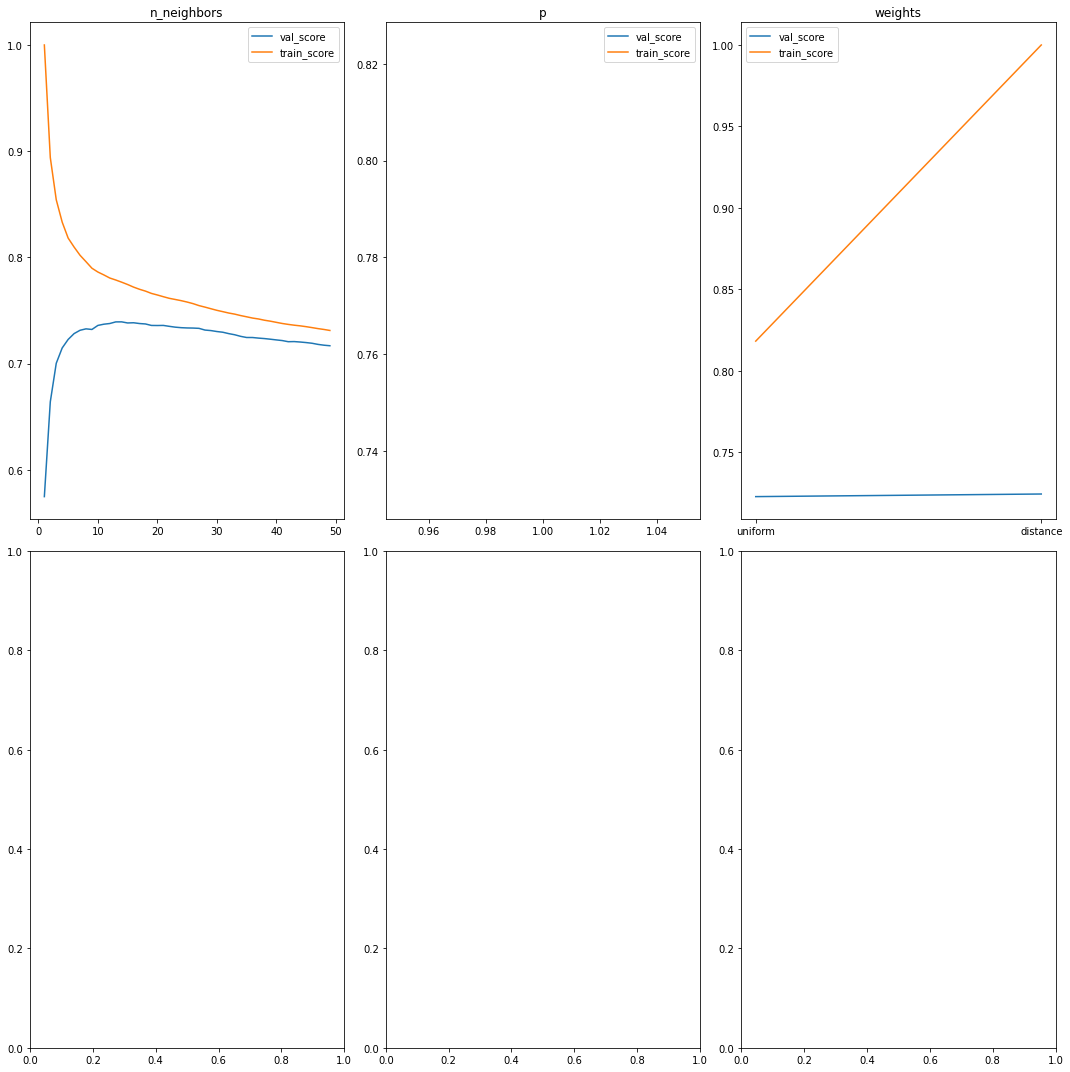

In [ ]:
validation_curves(KNeighborsRegressor(), params)

In [ ]:
# Best prediction according to the previous graphics
model = KNeighborsRegressor(n_neighbors = 20, p = 2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6905374490183362

## Random Forest

In [ ]:
#RandomForestRegressor().get_params()
# params = {#'bootstrap': [False, True], 
          #'ccp_alpha': np.arange(1, 10, 1),
          #'criterion': ['squared_error', 'absolute_error'],
          #'max_depth': np.arange(0, 10, 1),
          #'max_features': ['auto', 'sqrt', 'log2'],
          #'max_leaf_nodes': np.arange(10, 51, 10),
          #'max_samples': np.arange(10, 51, 10),
          #'min_impurity_decrease': np.arange(1, 10, 1),
          #'min_samples_leaf': np.arange(1, 10, 1),
          #'min_samples_split': np.arange(1, 10, 1),
          #'min_weight_fraction_leaf': np.arange(1, 10, 1),
          #'n_estimators': np.arange(100, 1000, 100),
          #'n_jobs': np.arange(1, 10, 1),
          #'oob_score': [False, True],
          #'verbose': np.arange(1, 10, 1),
          #'warm_start': [False, True]}

SyntaxError: ignored

ValueError: ignored

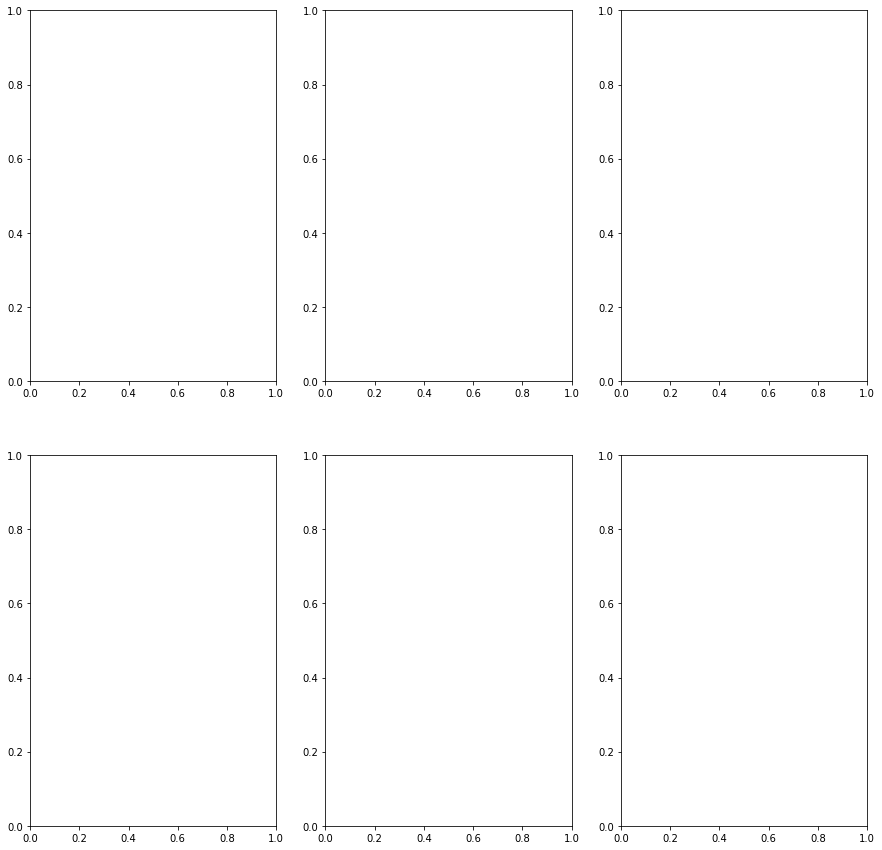

In [ ]:
model = RandomForestRegressor(criterion = "squared_error", bootstrap = True, ccp_alpha = 4.0, max_features = "log2")
model.fit(X_train, Y_train)
validation_curves(model, params)

In [ ]:
# Best prediction according to the previous graphics
model = RandomForestRegressor(criterion = "squared_error", bootstrap = True, ccp_alpha = 4.0, max_features = "log2", warm_start = True)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7550380193987886